In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Q1 Read the input file and check the data dimension

In [2]:
#Read input file and understand the data
# "default" is my dependent variable

In [3]:
ger_cr_pd = pd.read_csv("german_credit.csv")

In [4]:
ger_cr_pd.head(25)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes
5,0,no checking account,36,existing credits paid back duly till now,(vacation - does not exist?),9055,unknown/ no savings account,1 <= ... < 4 years,2,male : single,...,4,unknown / no property,35,none,for free,1,unskilled - resident,2,"yes, registered under the customers name",yes
6,0,no checking account,24,existing credits paid back duly till now,radio/television,2835,500 <= ... < 1000 DM,.. >= 7 years,3,male : single,...,4,if not A121 : building society savings agreeme...,53,none,own,1,skilled employee / official,1,none,yes
7,0,0 <= ... < 200 DM,36,existing credits paid back duly till now,car (used),6948,... < 100 DM,1 <= ... < 4 years,2,male : single,...,2,"if not A121/A122 : car or other, not in attrib...",35,none,rent,1,management/ self-employed/ highly qualified em...,1,"yes, registered under the customers name",yes
8,0,no checking account,12,existing credits paid back duly till now,domestic appliances,3059,.. >= 1000 DM,4 <= ... < 7 years,2,male : divorced/separated,...,4,real estate,61,none,own,1,unskilled - resident,1,none,yes
9,1,0 <= ... < 200 DM,30,critical account/ other credits existing (not ...,car (new),5234,... < 100 DM,unemployed,4,male : married/widowed,...,2,"if not A121/A122 : car or other, not in attrib...",28,none,own,2,management/ self-employed/ highly qualified em...,1,none,yes


In [5]:
ger_cr_pd.shape

(1000, 21)

In [6]:
ger_cr_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [7]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [9]:
# check for any missing data
ger_cr_pd.isna().sum()

default                       0
account_check_status          0
duration_in_month             0
credit_history                0
purpose                       0
credit_amount                 0
savings                       0
present_emp_since             0
installment_as_income_perc    0
personal_status_sex           0
other_debtors                 0
present_res_since             0
property                      0
age                           0
other_installment_plans       0
housing                       0
credits_this_bank             0
job                           0
people_under_maintenance      0
telephone                     0
foreign_worker                0
dtype: int64

In [16]:
ger_cr_pd.columns

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

In [17]:
ger_pd = pd.get_dummies(ger_cr_pd, columns = ['account_check_status','credit_history','purpose','savings','present_emp_since','personal_status_sex','other_debtors','property','other_installment_plans','housing','job','telephone','foreign_worker'])
ger_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 62 columns):
default                                                                       1000 non-null int64
duration_in_month                                                             1000 non-null int64
credit_amount                                                                 1000 non-null int64
installment_as_income_perc                                                    1000 non-null int64
present_res_since                                                             1000 non-null int64
age                                                                           1000 non-null int64
credits_this_bank                                                             1000 non-null int64
people_under_maintenance                                                      1000 non-null int64
account_check_status_0 <= ... < 200 DM                                        1000 non-null uint8
account_chec

### Check for highly correlated variables but don't required any treatment for this use case

In [18]:
ger_pd.corr()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
default,1.000000,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015,0.119581,0.258333,...,-0.134589,0.092785,0.040559,-0.013559,0.005951,-0.021822,0.036466,-0.036466,-0.082079,0.082079
duration_in_month,0.214927,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,0.089452,0.022244,...,-0.075169,-0.064417,0.147515,0.055010,-0.044043,-0.181203,-0.164718,0.164718,-0.138196,0.138196
credit_amount,0.154739,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,0.119612,-0.020912,...,-0.117497,-0.024611,0.319715,-0.092636,-0.027969,-0.161757,-0.276995,0.276995,-0.050050,0.050050
installment_as_income_perc,0.072404,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,-0.051906,0.046917,...,0.049922,-0.091373,0.042805,0.042623,-0.087834,-0.057237,-0.014413,0.014413,-0.090024,0.090024
present_res_since,0.002967,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,-0.055817,0.088350,...,-0.297547,0.167285,0.004952,-0.000657,-0.034545,0.009065,-0.095359,0.095359,-0.054097,0.054097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
job_unskilled - resident,-0.021822,-0.181203,-0.161757,-0.057237,0.009065,0.043712,-0.010392,0.145066,0.018041,0.023542,...,0.063003,0.014347,-0.208392,-0.652438,-0.074991,1.000000,0.253720,-0.253720,0.087412,-0.087412
telephone_none,0.036466,-0.164718,-0.276995,-0.014413,-0.095359,-0.145259,-0.065553,0.014753,-0.015276,0.067149,...,0.036275,0.049524,-0.385706,0.061289,0.040124,0.253720,1.000000,-1.000000,0.107401,-0.107401
"telephone_yes, registered under the customers name",-0.036466,0.164718,0.276995,0.014413,0.095359,0.145259,0.065553,-0.014753,0.015276,-0.067149,...,-0.036275,-0.049524,0.385706,-0.061289,-0.040124,-0.253720,-1.000000,1.000000,-0.107401,0.107401
foreign_worker_no,-0.082079,-0.138196,-0.050050,-0.090024,-0.054097,-0.006151,-0.009717,0.077071,-0.059172,0.057751,...,0.018960,0.032849,-0.051858,-0.047292,0.042834,0.087412,0.107401,-0.107401,1.000000,-1.000000


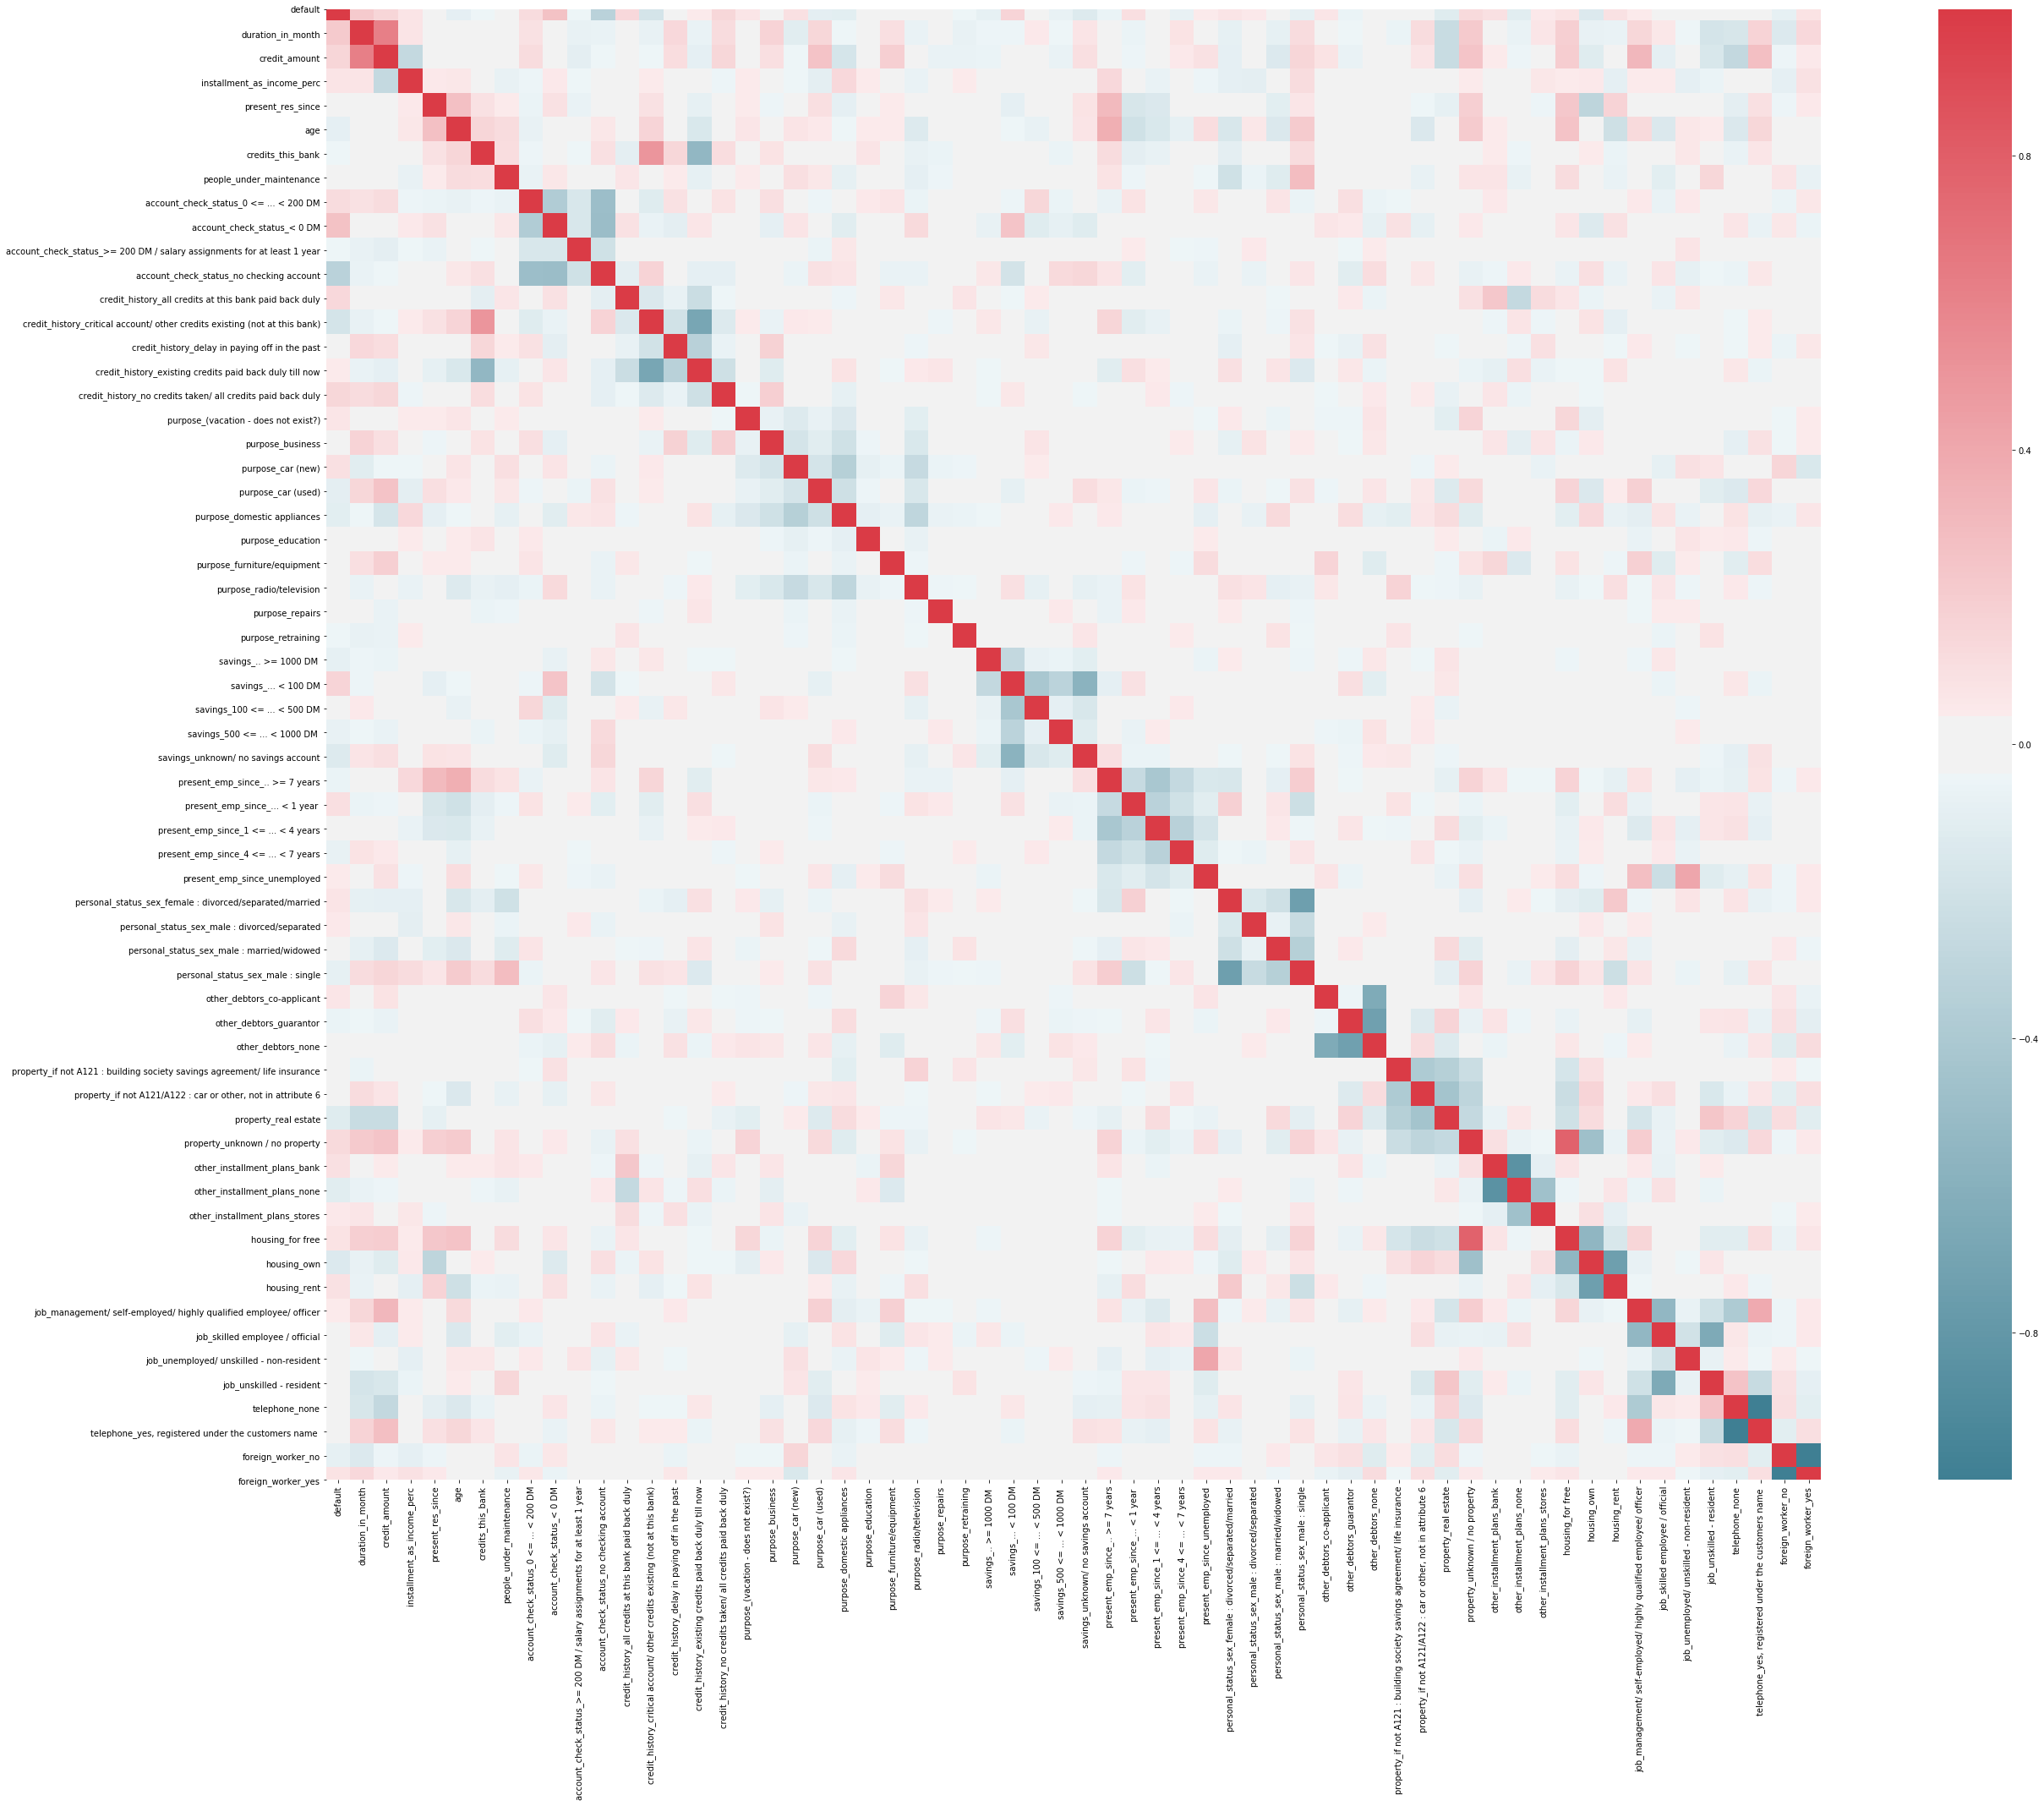

In [19]:
import seaborn as sns

f, ax = plt.subplots(figsize=(50, 32))
corr = ger_pd.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

## From the above heatmap and correlation matrix we can observe
1. High correlation between Duration and credit amount

In [24]:
ger_pd.describe(include = 'all')

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.269000,0.274000,...,0.713000,0.179000,0.148000,0.630000,0.022000,0.2000,0.596000,0.404000,0.037000,0.963000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.443662,0.446232,...,0.452588,0.383544,0.355278,0.483046,0.146757,0.4002,0.490943,0.490943,0.188856,0.188856
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.0000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.0000,1.000000,1.000000,0.000000,1.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000


### Drop the original variables which are converted to dummy

## #In the dataframe ger_pd we can see that the original variables are dropped after dummy variables were created

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [25]:
from sklearn.model_selection import train_test_split
X =  ger_pd.drop("default", axis=1)
y = pd.DataFrame(ger_pd.pop("default"))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [56]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)

In [57]:
#Train the model
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
                       oob_score=False, random_state=9999, verbose=0,
                       warm_start=False)

In [58]:
Y_pred = model.predict(X_test)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix
model_conf = confusion_matrix(y_test,Y_pred)
print(model_conf)

[[188  14]
 [ 66  32]]


In [60]:
model_acc = accuracy_score(y_test,Y_pred)
print(model_acc)

0.7333333333333333


### Q6 Show the list of the features importance( 1 Marks)

In [61]:
# Feature importance means finding features using a Random forest classifier
# Two great features RF provides 'mean decrease impurity' and 'mean decrease accuracy'
# It shows how much each feature decreases the weighted impurity in a tree of Random Forest
# The optimal condition as impurity by using Gini method
feat_imp = pd.DataFrame()
feat_imp['feature'] = X_train.columns
feat_imp['importance'] = model.feature_importances_
feat_imp

,feature,importance
0,duration_in_month,0.077297
1,credit_amount,0.092671
2,installment_as_income_perc,0.036739
3,present_res_since,0.032954
4,age,0.081006
...,...,...
56,job_unskilled - resident,0.010551
57,telephone_none,0.013435
58,"telephone_yes, registered under the customers ...",0.013320
59,foreign_worker_no,0.003947


In [64]:
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
credit_amount,0.092671
age,0.081006
duration_in_month,0.077297
account_check_status_no checking account,0.053372
installment_as_income_perc,0.036739
...,...
foreign_worker_yes,0.003752
job_unemployed/ unskilled - non-resident,0.002617
purpose_repairs,0.002045
purpose_furniture/equipment,0.001927


### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [65]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [66]:
# Use below values
num_folds = 10
seed = 77

In [67]:
#Validate the Random Forest model build above using k fold

In [68]:
kfold = KFold(n_splits=num_folds,random_state=seed)

In [69]:
results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

In [0]:
#Calculate Mean score

In [71]:
print(results.mean())

0.7728571428571429


In [72]:
# Calculate score standard deviation using std()

In [73]:
print(results.std())

0.04113194299682278


# Q8 Print the confusion matrix( 1 Marks)

In [74]:
model_conf_kfold = confusion_matrix(y_test,Y_pred)
print(model_conf_kfold)

[[188  14]
 [ 66  32]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
(2 Marks)

In [76]:
from sklearn.metrics import classification_report

In [77]:
class_report = classification_report(y_test,Y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.74      0.93      0.82       202
           1       0.70      0.33      0.44        98

    accuracy                           0.73       300
   macro avg       0.72      0.63      0.63       300
weighted avg       0.73      0.73      0.70       300



[link text](https://)### Bootstrapping ( Bonus and Optional)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [78]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [79]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    model.fit(X_, y_)
    y_predicted = model.predict(X_test)
    
    acc = accuracy_score(y_predicted, y_test)
    accuracy.append(acc)

In [81]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Average: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Average:  0.7290000000000001
Standard deviation:  0.009666666666666658
